In [4]:
import pandas as pd
df = pd.read_csv("youtube.csv")
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1881 non-null   int64  
 1   Title         1881 non-null   object 
 2   Video ID      1881 non-null   object 
 3   Published At  1881 non-null   object 
 4   Keyword       1881 non-null   object 
 5   Likes         1879 non-null   float64
 6   Comments      1879 non-null   float64
 7   Views         1879 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.7+ KB


C:\Users\cizhu\AppData\Local\Temp\ipykernel_9232\3935210474.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Views",y="Title",data=top10,palette="magma")


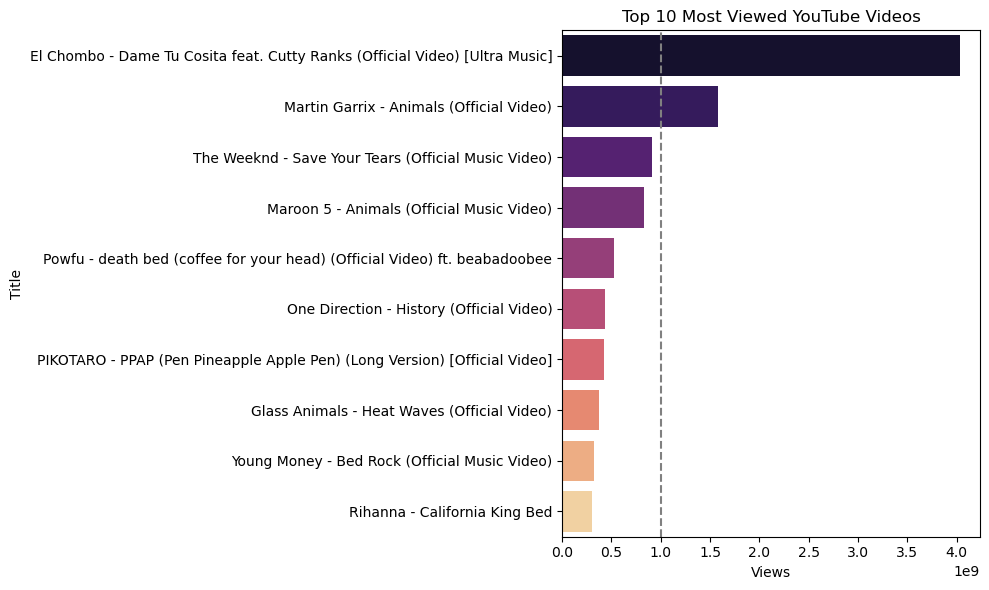

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.dropna()
df["Published At"] = pd.to_datetime(df["Published At"])

top10 = df.sort_values(by="Views",ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Views",y="Title",data=top10,palette="magma")
plt.title("Top 10 Most Viewed YouTube Videos")
plt.xlabel("Views")
plt.ylabel("Title")
plt.axvline(1e9,color='gray',linestyle = '--')
plt.tight_layout()

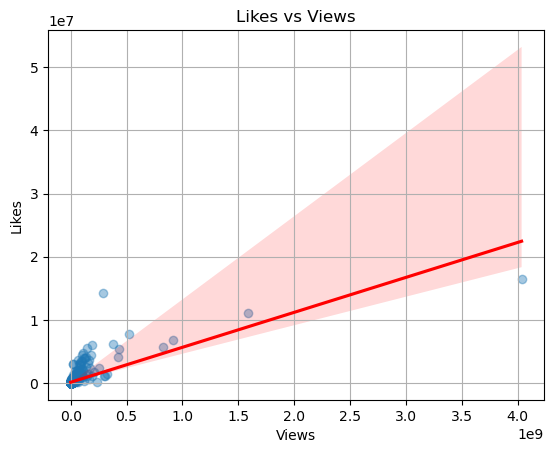

相關係數 =  0.7544748067423888


In [14]:
df_clean = df.dropna(subset=['Likes','Views'])

sns.regplot(x='Views',y='Likes',data=df_clean,scatter_kws={'alpha':0.4},line_kws={'color':'red'})
plt.title("Likes vs Views")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.grid(True)
plt.show()
print("相關係數 = ", df_clean['Likes'].corr(df_clean['Views']))

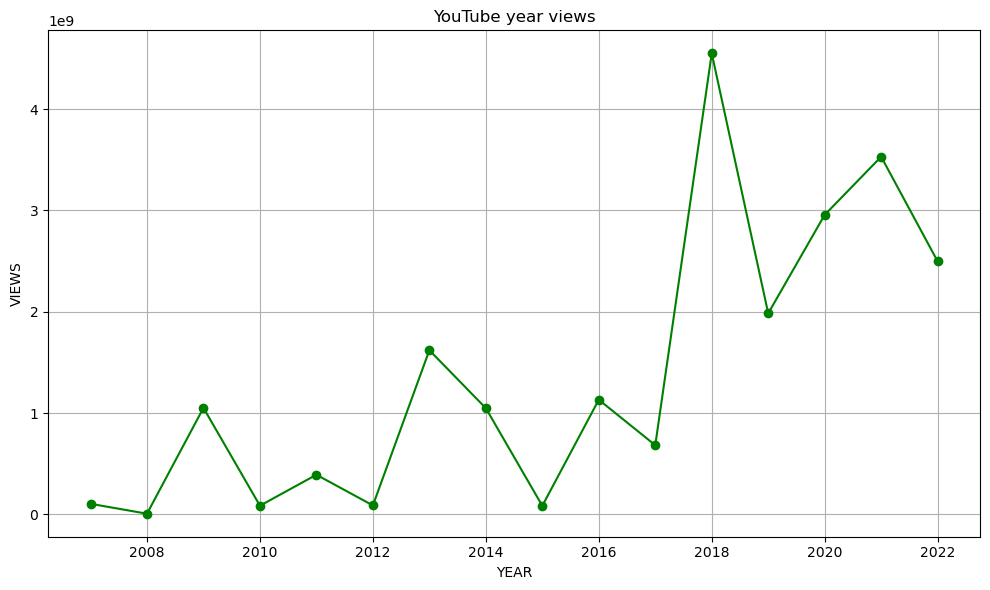

In [18]:
df['Published At'] = pd.to_datetime(df['Published At'],errors='coerce')
df['Year'] = df['Published At'].dt.year
year = df.groupby('Year')['Views'].sum()
plt.figure(figsize=(10,6))
year.plot(kind='line', marker='o', color='green')
plt.title("YouTube year views")
plt.xlabel("YEAR")
plt.ylabel("VIEWS")
plt.grid(True)
plt.tight_layout()
plt.show()

相關係數 = 0.6596540467107397


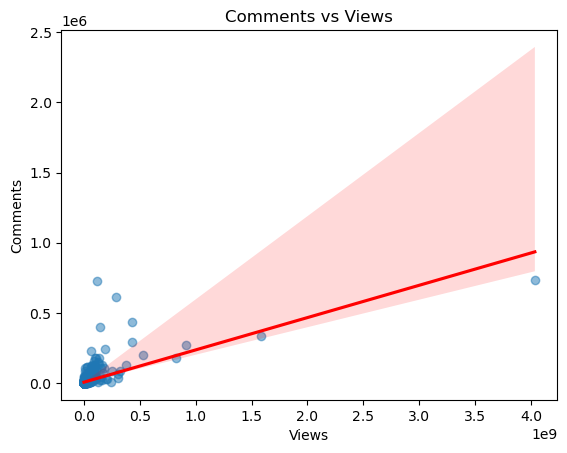

In [20]:
df_clean = df.dropna(subset=['Comments', 'Views'])
sns.regplot(x='Views',y='Comments',data=df_clean,scatter_kws={'alpha':0.5},line_kws = {'color':'red'})
plt.title("Comments vs Views")
plt.xlabel("Views")
plt.ylabel("Comments")
print("相關係數 =" ,df_clean['Comments'].corr(df_clean['Views']))

C:\Users\cizhu\AppData\Local\Temp\ipykernel_9232\704185671.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Views', y='Keyword', data=kw_df, palette='magma')


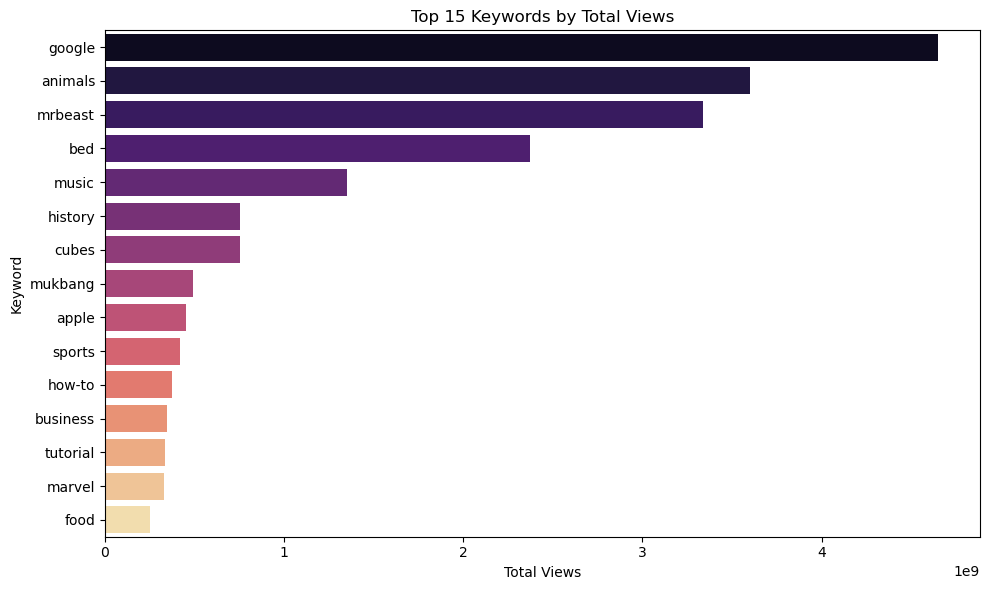

In [21]:
from collections import Counter

df_keywords = df.dropna(subset=['Keyword'])

keyword_views = {}
for i,row in df_keywords.iterrows():
    keywords = str(row['Keyword']).lower().split('|')
    for kw in keywords:
        if kw.strip():
            keyword_views[kw] = keyword_views.get(kw, 0) + row['Views']
kw_df = pd.DataFrame(keyword_views.items(), columns=['Keyword', 'Total_Views'])
kw_df = kw_df.sort_values(by='Total_Views', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='Total_Views', y='Keyword', data=kw_df, palette='magma')
plt.title("Top 15 Keywords by Total Views")
plt.xlabel("Total Views")
plt.ylabel("Keyword")
plt.tight_layout()